<a href="https://colab.research.google.com/github/NoriegaCL/IA_Python/blob/main/Exe01_Sktlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart-disease.csv to heart-disease.csv


In [ ]:

df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


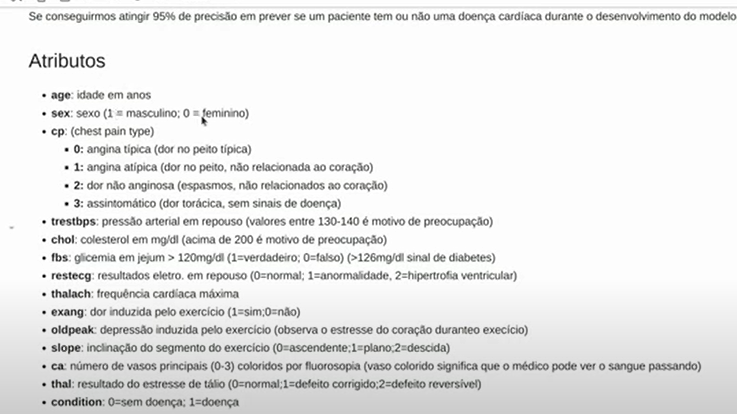

In [ ]:
#EDA - Análise exploratória de dados
#vamos nos familiarizar com os dados.
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
df["target"].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

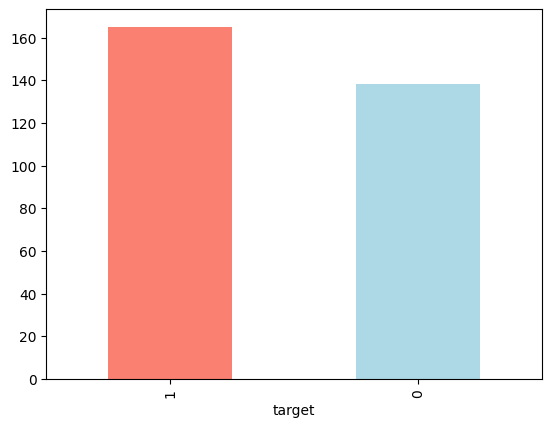

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [ ]:
df.info()
#para ver se temos colunas ausentes e sua formatação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#crosstab compara colunas e dados
pd.crosstab(df["target"], df["sex"])
#observe que das quase 100 mulheres, quase 50% tem doença cardia, e nos h (uns 200) 50% tem doença card.

sex,0,1
target,,
0,24,114
1,72,93


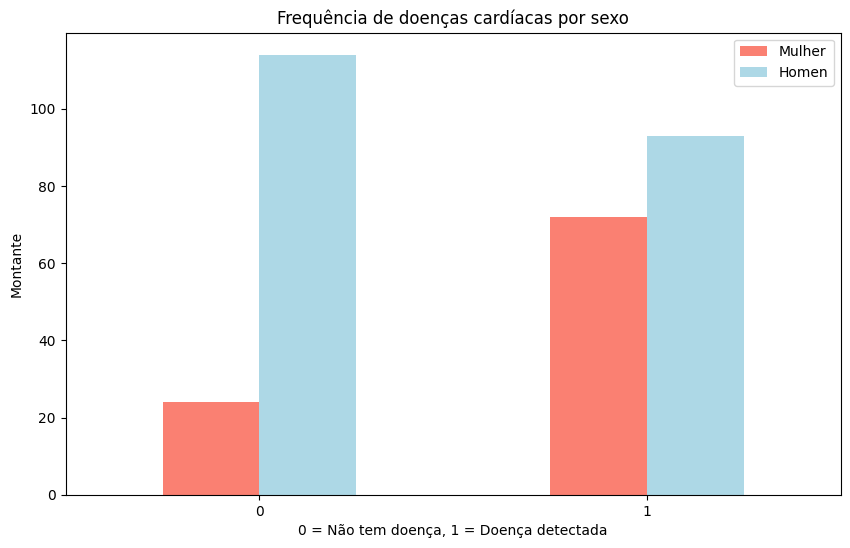

In [ ]:
#vamos plotar o crosstab para visualizar melhor os dados
# Criando o plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Adicionando atributos
plt.title("Frequência de doenças cardíacas por sexo")
plt.xlabel("0 = Não tem doença, 1 = Doença detectada")
plt.ylabel("Montante")
plt.legend(["Mulher", "Homen"])
plt.xticks(rotation=0); # configura os eixos dos labels para vertical

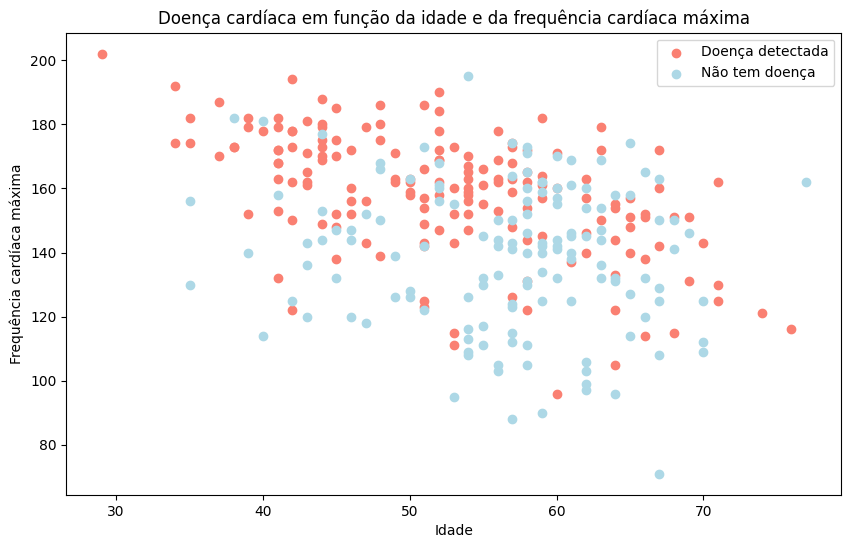

In [ ]:
#vamos plotar idade(age) e freq.cardiaca(thalac) com a condição (target)
plt.figure(figsize=(10,6))

# Plot para valores positivos - com doença
plt.scatter(df["age"][df["target"] ==1 ],
            df["thalach"][df["target"] == 1],
            c="salmon")

# Plot para valores negativos = sem doença
# queremos plotar no mesmo gráfico então não vamos configurar axes diferentes
plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            c="lightblue")

# Atributos
plt.title("Doença cardíaca em função da idade e da frequência cardíaca máxima")
plt.xlabel("Idade")
plt.legend(["Doença detectada", "Não tem doença"])
plt.ylabel("Frequência cardíaca máxima");

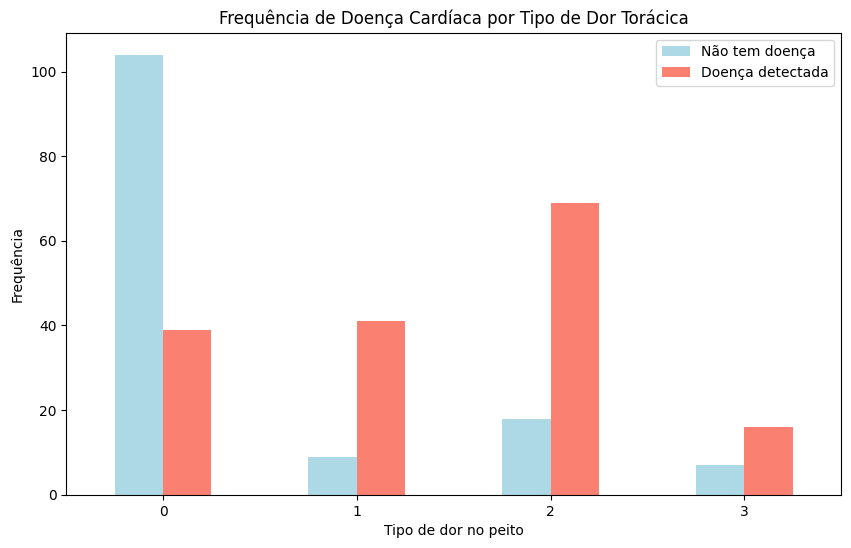

In [ ]:
#vamos ver agora a relação entre  a condição com a dor de peito
pd.crosstab(df["cp"], df["target"]).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["lightblue", "salmon"])

# Adicionando atributos ao gráfico
plt.title("Frequência de Doença Cardíaca por Tipo de Dor Torácica")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"])
plt.xticks(rotation = 0);

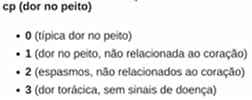

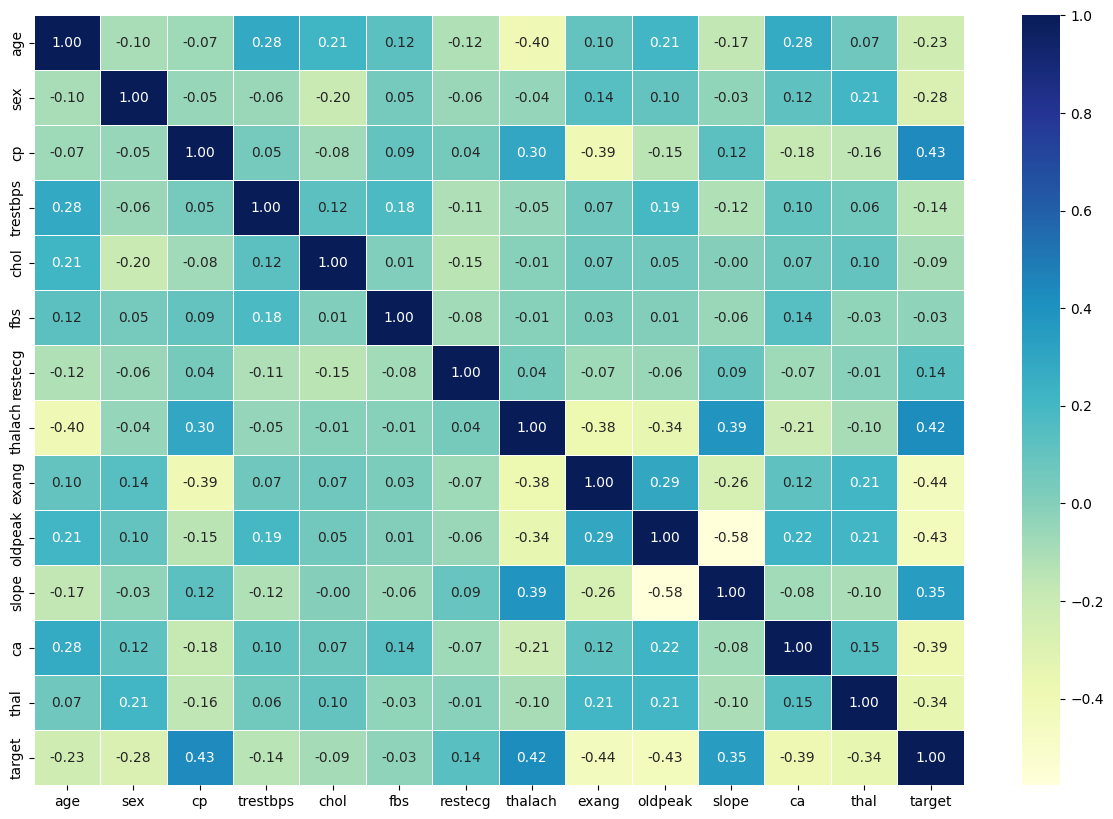

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {"KNN": KNeighborsClassifier(),
           "Logistc Regression": LogisticRegression(max_iter=1000),
           "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_scores = {}

  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6885245901639344,
 'Logistc Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

In [ ]:
# Lista para armazenar o score de treino
train_scores = []

# Lista para armazenar o score de teste
test_scores = []

# Lista com diferentes valores para "n_neighbors"
# vamos começar com 1 e subir até 20
neighbors = range(1, 21)

# Instanciando o KNN
knn = KNeighborsClassifier()

# Loop para aplicar os diferentes valores em "n_neighbors"
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Treina o modelo
    knn.fit(X_train, y_train)

    # Guarda o score de treino
    train_scores.append(knn.score(X_train, y_train))

    # Armazena o score de teste
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Desempenho máximo de KNN nos dados de teste: 75.41%


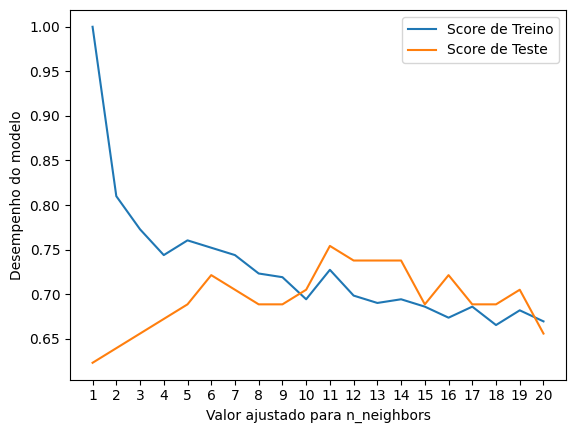

In [ ]:
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")

https://www.youtube.com/watch?v=SvmFqZ4cD-I